In [1]:
import torch
from torch import nn
from torch.nn import init
import numpy as np
import d2lzh as d2l

batch_size = 256
train_iter,test_iter = d2l.load_data_fashion_mnist(batch_size)

print(len(train_iter))
print(len(test_iter))

235
40


In [2]:
num_inputs = 28 * 28
num_outputs = 10

class LinearNet(nn.Module):
    def __init__(self,num_inputs,num_outputs):
        super(LinearNet,self).__init__()
        self.linear = nn.Linear(num_inputs,num_outputs)

    def forward(self,x): # x shape : [batch_size,1,28,28]
        y = self.linear(x.view(x.shape[0],-1))
        return y

net = LinearNet(num_inputs,num_outputs)

# 改变输入图片的shape
class FlattenLayer(nn.Module):
    def __init__(self):
        super(FlattenLayer,self).__init__()

    def forward(self,x):  # x shape :[batch,*,*,...]
        return x.view(x.shape[0],-1)


from collections import OrderedDict
net = nn.Sequential(OrderedDict([
    ("flatten",FlattenLayer()),
    ("linear",nn.Linear(num_inputs,num_outputs))
]))

init.normal_(net.linear.weight,mean=0,std=0.01)
init.constant_(net.linear.bias,val=0)

loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(),lr=0.1)

num_epochs = 5
batch_size = 256
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,batch_size,None,None,optimizer)

changeing train
epoch 1,loss 0.0031,train acc 0.749,test_acc 0.766
epoch 2,loss 0.0022,train acc 0.812,test_acc 0.812
epoch 3,loss 0.0021,train acc 0.825,test_acc 0.818
epoch 4,loss 0.0020,train acc 0.832,test_acc 0.823
epoch 5,loss 0.0019,train acc 0.836,test_acc 0.823


[5 0 6 1 8 0 0 9 4 0 9 0 8 5 6 0 9 1 8 1 3 2 5 5 0 1 3 0 3 7 8 2 4 6 3 8 5
 9 7 9 6 9 8 1 5 5 5 6 6 8 5 7 3 0 3 8 4 7 5 0 3 1 5 0 8 5 1 0 7 8 3 0 9 5
 4 4 2 2 6 1 4 9 3 3 4 4 1 4 8 0 4 6 1 3 5 8 5 3 8 4 4 4 9 6 4 2 8 4 8 1 0
 9 2 8 6 2 7 2 5 4 8 6 3 3 6 4 1 0 7 0 3 7 4 7 4 3 7 2 2 9 1 9 3 8 2 9 6 4
 4 6 4 0 7 0 3 0 1 9 3 3 7 5 6 4 0 8 3 9 7 9 6 0 5 4 3 0 3 2 2 8 0 2 7 7 3
 0 4 5 3 7 3 8 5 0 8 3 2 8 2 4 3 5 2 2 7 1 7 9 2 3 2 3 0 8 7 1 6 1 4 3 0 1
 5 2 0 1 3 5 7 2 2 5 2 2 8 3 8 9 9 4 8 4 5 4 0 2 7 1 4 7 0 8 3 3 1 7]


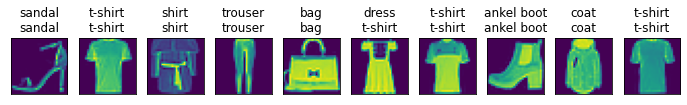

In [3]:
X,y = iter(test_iter).next()

X,y = iter(train_iter).next()
print(net(X).argmax(dim=1).numpy())
true_labels = d2l.get_fashion_mnist_labels(y.numpy())
pred_labels = d2l.get_fashion_mnist_labels(net(X).argmax(dim=1).numpy())



titles = [true + "\n" + pred for true,pred in zip(true_labels,pred_labels)]

d2l.show_fashion_mnist(X[0:10],titles[0:10])